In [34]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline
#######
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import panel as pn
from panel.interact import interact
import datetime as dt
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px

pn.extension("plotly")

In [2]:
#read aggregate data csv
aggregate_df= pd.read_csv("aggregate_data.csv")
aggregate_df.set_index(pd.to_datetime(aggregate_df['date'], infer_datetime_format=True), inplace=True)
aggregate_df.drop(columns=['date'], inplace=True)
agg_df_asc= aggregate_df.sort_index(ascending= True)
agg_df_asc.head()

BOOZ   SMOK      MJ    XBI    XPH     SPY
date                                                   
2016-09-19   98.87  83.69  29.457  65.89  46.00  213.41
2016-09-20   99.61  84.02  29.457  67.51  46.12  213.42
2016-09-21  101.36  85.08  29.457  68.28  46.27  215.82
2016-09-22  102.83  85.97  30.460  68.83  46.56  217.18
2016-09-23  102.85  85.75  30.170  68.14  46.91  215.99

In [3]:
#calculate 2 year returns for indexes and drop nulls
df_daily_returns = agg_df_asc.pct_change().dropna()
df_daily_returns.head()

BOOZ      SMOK        MJ       XBI       XPH       SPY
date                                                                  
2016-09-20  0.007485  0.003943  0.000000  0.024586  0.002609  0.000047
2016-09-21  0.017569  0.012616  0.000000  0.011406  0.003252  0.011245
2016-09-22  0.014503  0.010461  0.034050  0.008055  0.006268  0.006302
2016-09-23  0.000194 -0.002559 -0.009521 -0.010025  0.007517 -0.005479
2016-09-26  0.000194 -0.020292  0.000000 -0.005430 -0.026220 -0.008102

In [4]:
# Calculate Sharpe Ratio
sharpe_ratios = (df_daily_returns.mean() * 756) / (df_daily_returns.std() * np.sqrt(756))
sharpe_ratios

BOOZ    0.268030
SMOK   -0.768188
MJ      0.004573
XBI     0.711276
XPH    -0.416935
SPY     1.647644
dtype: float64

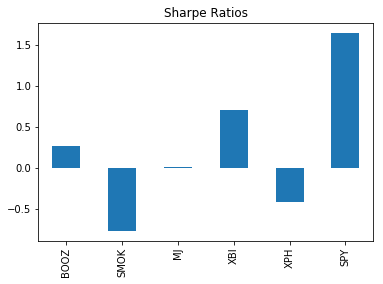

In [5]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

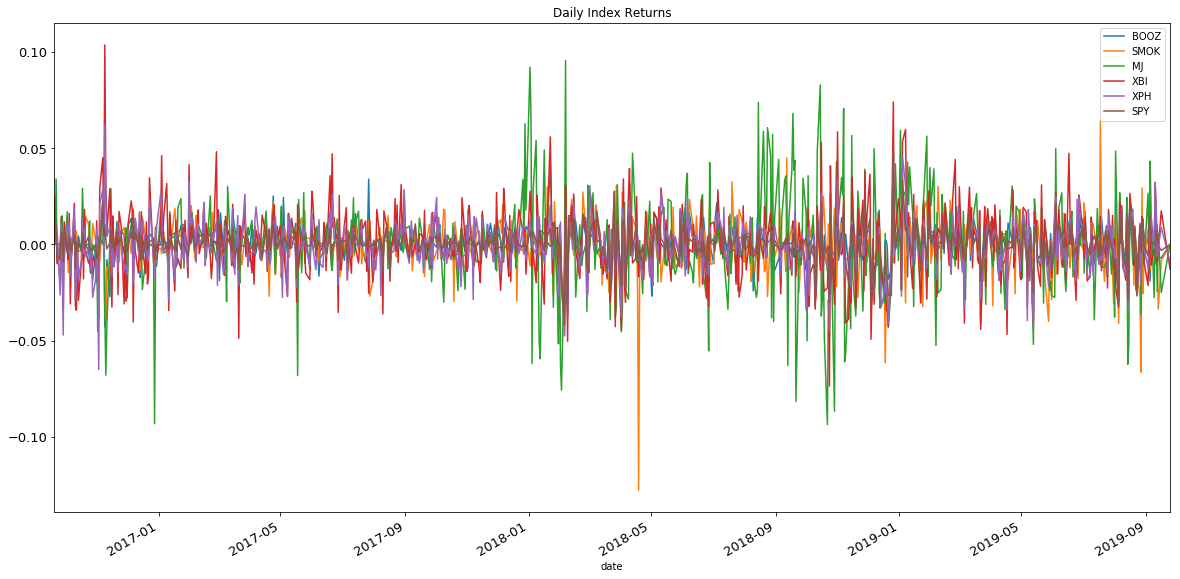

In [6]:
# Plot daily retuns for indexes
df_daily_returns.plot(figsize=(20,10), title= "Daily Index Returns", fontsize=13);

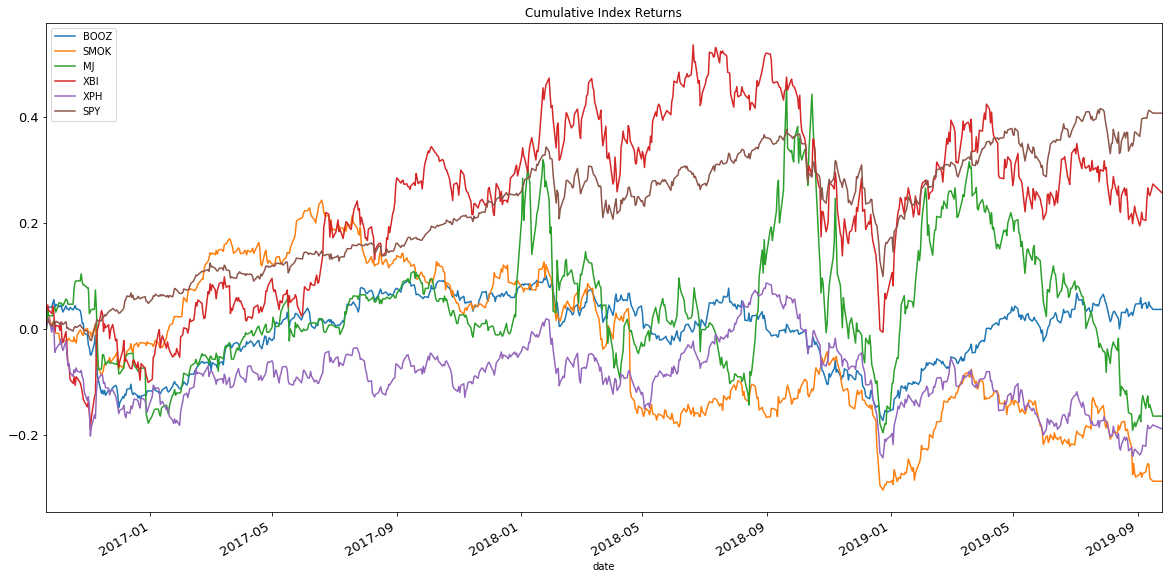

In [7]:
# Plot cumulative returns for the indexes
cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
cumulative_returns_indexes.plot(figsize=(20,10), title= "Cumulative Index Returns", fontsize=13);

In [8]:
#HV plot of cumulative returns
cumulative_returns_indexes.hvplot.line(ylabel= "cumulative returns", xlabel= "date")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

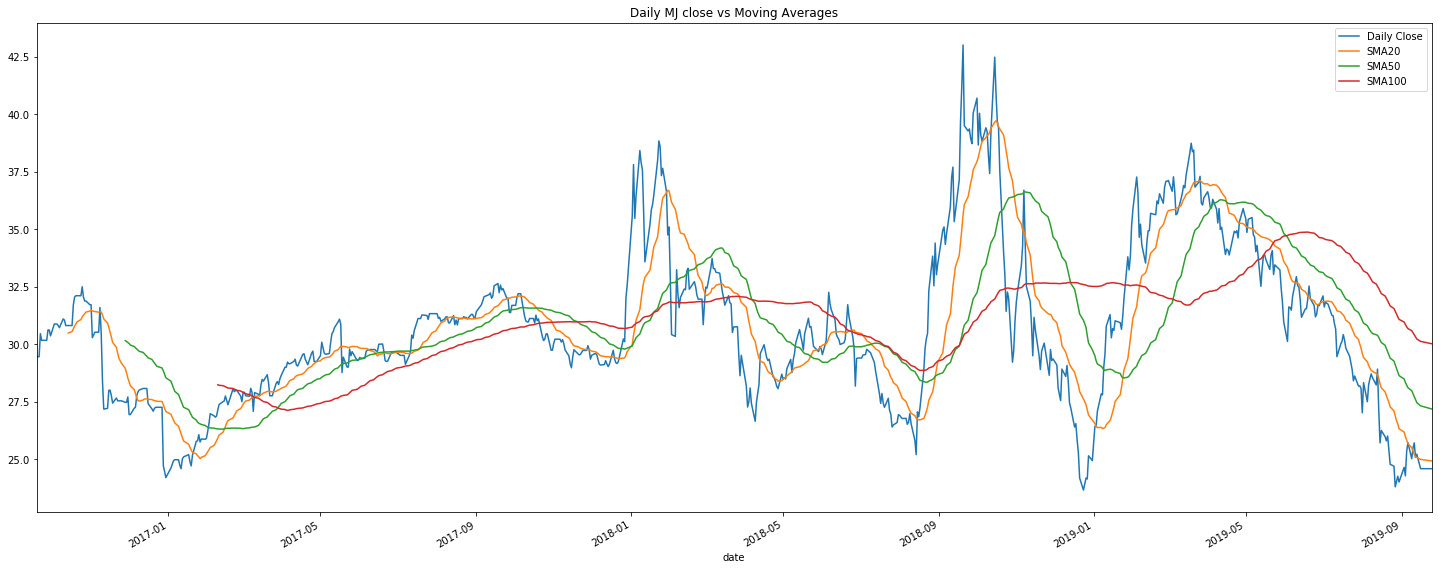

In [9]:
#20, 50,100 day SMA of MJ
mj_sma_20 = agg_df_asc["MJ"].rolling(window=20).mean()
mj_sma_50 = agg_df_asc["MJ"].rolling(window=50).mean()
mj_sma_100 = agg_df_asc["MJ"].rolling(window=100).mean()
axes = agg_df_asc['MJ'].plot(figsize=(25,10), title= "Daily MJ close vs Moving Averages")
mj_sma_20.plot(ax=axes)
mj_sma_50.plot(ax=axes)
mj_sma_100.plot(ax=axes)
axes.legend(["Daily Close", "SMA20", "SMA50", "SMA100"]);

In [10]:
# Daily Standard Deviations if indexes
# Calculate the standard deviation for each portfolio. 
indexes_daily_std= cumulative_returns_indexes.std()
indexes_daily_std.sort_values(ascending=False)

XBI     0.163155
SMOK    0.137695
MJ      0.117036
SPY     0.111516
BOOZ    0.063705
XPH     0.062148
dtype: float64

In [11]:
annualized_std_indexes = indexes_daily_std * np.sqrt(252)
annualized_std_indexes


BOOZ    1.011293
SMOK    2.185848
MJ      1.857890
XBI     2.590008
XPH     0.986565
SPY     1.770265
dtype: float64

In [12]:
correlation= agg_df_asc.corr()
correlation

BOOZ      SMOK        MJ       XBI       XPH       SPY
BOOZ  1.000000  0.305083  0.218449  0.453539  0.275505  0.318264
SMOK  0.305083  1.000000 -0.041690 -0.334894  0.279037 -0.562516
MJ    0.218449 -0.041690  1.000000  0.451009  0.414439  0.393592
XBI   0.453539 -0.334894  0.451009  1.000000  0.423882  0.831621
XPH   0.275505  0.279037  0.414439  0.423882  1.000000  0.073947
SPY   0.318264 -0.562516  0.393592  0.831621  0.073947  1.000000

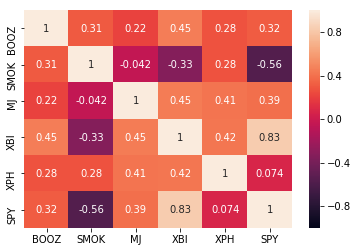

In [13]:
import seaborn as sns
corr_all = agg_df_asc.corr()
sns.heatmap(corr_all, xticklabels=corr_all.columns.values, vmin=-1, vmax=1,
            yticklabels=corr_all.columns.values, annot= True)

In [14]:
#daily returns pct change
df_daily_returns.head()

BOOZ      SMOK        MJ       XBI       XPH       SPY
date                                                                  
2016-09-20  0.007485  0.003943  0.000000  0.024586  0.002609  0.000047
2016-09-21  0.017569  0.012616  0.000000  0.011406  0.003252  0.011245
2016-09-22  0.014503  0.010461  0.034050  0.008055  0.006268  0.006302
2016-09-23  0.000194 -0.002559 -0.009521 -0.010025  0.007517 -0.005479
2016-09-26  0.000194 -0.020292  0.000000 -0.005430 -0.026220 -0.008102

In [15]:
#annualized volatility
volatility = df_daily_returns.std() * np.sqrt(252)
volatility

BOOZ    0.141347
SMOK    0.207236
MJ      0.350061
XBI     0.283631
XPH     0.204419
SPY     0.128754
dtype: float64

In [16]:
#calculate average daily returns of each index
avg_daily_return_booz = df_daily_returns.mean()['BOOZ']
avg_daily_return_smok = df_daily_returns.mean()['SMOK']
avg_daily_return_mj = df_daily_returns.mean()['MJ']
avg_daily_return_xbi = df_daily_returns.mean()['XBI']
avg_daily_return_xph = df_daily_returns.mean()['XPH']
avg_daily_return_spy = df_daily_returns.mean()['SPY']
print("BOOZ average daily return is", avg_daily_return_booz)
print("SMOK average daily return is", avg_daily_return_smok)
print("MJ average daily return is", avg_daily_return_mj)
print("XBI average daily return is", avg_daily_return_xbi)
print("XPI average daily return is", avg_daily_return_xph)
print("SPY average daily return is", avg_daily_return_spy)

BOOZ average daily return is 8.679804971413078e-05
SMOK average daily return is -0.0003647300203599301
MJ average daily return is 3.66795916561003e-06
XBI average daily return is 0.0004622016905746064
XPI average daily return is -0.00019526748493822746
SPY average daily return is 0.00048603052609922916


In [17]:
#calculate daily std dev of indexes
std_dev_daily_return_booz = df_daily_returns.std()['BOOZ']
std_dev_daily_return_smok = df_daily_returns.std()['SMOK']
std_dev_daily_return_mj = df_daily_returns.std()['MJ']
std_dev_daily_return_xbi = df_daily_returns.std()['XBI']
std_dev_daily_return_xph = df_daily_returns.std()['XPH']
std_dev_daily_return_spy = df_daily_returns.std()['SPY']
print("BOOZ volatility is", std_dev_daily_return_booz)
print("SMOK volatility is", std_dev_daily_return_smok)
print("MJ volatility is", std_dev_daily_return_mj)
print("XBI volatility is", std_dev_daily_return_xbi)
print("XPH volatility is", std_dev_daily_return_xph)
print("SPY volatility is", std_dev_daily_return_spy)

BOOZ volatility is 0.008904031055788826
SMOK volatility is 0.013054637625755917
MJ volatility is 0.022051761164075038
XBI volatility is 0.017867101297148497
XPH volatility is 0.012877218060406787
SPY volatility is 0.008110748686137108


In [18]:
#show the final closigprices
booz_last_price = aggregate_df['BOOZ'][0]
smok_last_price = aggregate_df['SMOK'][0]
mj_last_price = aggregate_df['MJ'][0]
xbi_last_price = aggregate_df['XBI'][0]
xph_last_price = aggregate_df['XPH'][0]
spy_last_price = aggregate_df['SPY'][0]
print(booz_last_price)
print(smok_last_price)
print(mj_last_price)
print(xbi_last_price)
print(xph_last_price)
print(spy_last_price)

102.44
59.58
24.59
82.79
37.3
300.16


In [19]:
# Setup the Monte Carlo Parameters 500msimulations over 2 years
number_simulations = 2000
number_records = 252 * 2
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()


In [20]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices = [mj_last_price]
    simulated_booz_prices = [booz_last_price]
    #simulated_smok_prices = [smok_last_price]
    
    # Simulate the returns
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_mj_price = simulated_mj_prices[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        simulated_booz_price = simulated_booz_prices[-1] * (1 + np.random.normal(avg_daily_return_booz, std_dev_daily_return_booz))
        #simulated_smok_price = simulated_smok_prices[-1] * (1 + np.random.normal(avg_daily_return_smok, std_dev_daily_return_smok))
       
        # Append the simulated price to the list
        simulated_mj_prices.append(simulated_mj_price)
        simulated_booz_prices.append(simulated_booz_price)
        #simulated_smok_prices.append(simulated_smok_price)
    
        
    monte_carlo["MJ prices"] = pd.Series(simulated_mj_prices)
    monte_carlo["BOOZ prices"] = pd.Series(simulated_booz_prices)
    #monte_carlo["SMOK prices"] = pd.Series(simulated_smok_prices)
    #print(monte_carlo)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
   
    # Set the portfolio weights50/50
    weight = [.5, .5]
    portfolio_daily_return= simulated_daily_returns.dot(weight)
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_return.fillna(0)).cumprod()
portfolio_cumulative_returns.tail()

0         1         2         3         4         5         6     \
500  0.665963  1.052795  0.695107  0.755832  0.928576  1.038010  1.265824   
501  0.659342  1.059130  0.698238  0.757942  0.948915  1.029033  1.283777   
502  0.651313  1.058121  0.698541  0.755357  0.963177  1.042264  1.301822   
503  0.651754  1.065294  0.702131  0.751745  0.951795  1.031542  1.295696   
504  0.645682  1.064685  0.687858  0.742103  0.958589  1.051093  1.296095   

         7         8         9     ...      1990      1991      1992  \
500  1.318579  1.001058  0.962479  ...  0.891193  0.688491  1.944075   
501  1.333822  0.986909  0.967915  ...  0.883589  0.674470  1.946774   
502  1.337215  0.990018  0.965558  ...  0.878390  0.654913  1.957458   
503  1.361170  0.990258  0.953480  ...  0.882457  0.672109  1.986466   
504  1.385093  0.989990  0.937163  ...  0.888166  0.665404  1.952904   

         1993      1994      1995      1996      1997      1998      1999  
500  1.471743  0.906388  1.330266  0.961774  0.793643  1.553157  0.699769  
501  1.480995  0.915602  1.312979  0.955985  0.793689  1.566810  0.701741  
502  1.488273  0.921422  1.324789  0.970826  0.809151  1.586279  0.710584  
503  1.504645  0.948064  1.314851  0.960266  0.804444  1.585245  0.711047  
504  1.515852  0.938648  1.321565  0.948314  0.809738  1.550868  0.708804  

[5 rows x 2000 columns]

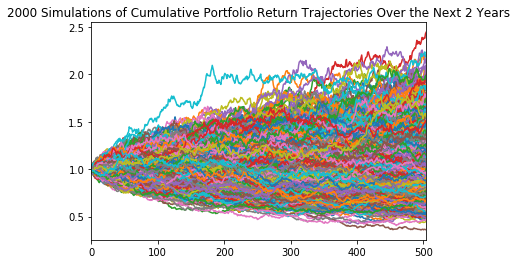

In [22]:
#STARSTAR
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 2 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [23]:
# Monte carlo for MJ index 500 simulations in 2 years

mj_sim_df= pd.DataFrame()

for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices_index = [mj_last_price]

    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        mj_sim_price = simulated_mj_prices_index[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        # Append the simulated price to the list
        simulated_mj_prices_index.append(mj_sim_price)
    
    # Create a DataFrame of the simulated prices
    #simulated_price_df = pd.DataFrame({
        #"Simulated MJ Prices": simulated_mj_prices
        #})

    # Print head of DataFrame
    mj_sim_df[f"Simulation {n+1}"]= pd.Series(simulated_mj_prices_index)
mj_sim_df.head()

Simulation 1  Simulation 2  Simulation 3  Simulation 4  Simulation 5  \
0     24.590000     24.590000     24.590000     24.590000     24.590000   
1     25.081830     23.536019     23.799949     25.154904     24.667118   
2     26.132165     23.470702     24.064910     25.349189     24.723123   
3     25.426415     23.250873     24.042969     25.817084     24.242482   
4     25.962606     22.781337     24.246269     25.680005     23.427099   

   Simulation 6  Simulation 7  Simulation 8  Simulation 9  Simulation 10  ...  \
0     24.590000     24.590000     24.590000     24.590000      24.590000  ...   
1     24.910718     25.104278     24.283234     24.774589      24.761549  ...   
2     24.588241     24.318363     23.884460     24.608239      24.326522  ...   
3     24.901704     24.366843     24.682796     24.288622      24.264409  ...   
4     25.230911     24.873351     24.496443     24.390103      24.860787  ...   

   Simulation 1991  Simulation 1992  Simulation 1993  Simulation 1994  \
0        24.590000        24.590000        24.590000        24.590000   
1        24.828231        24.699148        24.201580        25.245552   
2        24.878575        24.536373        23.409371        24.753378   
3        24.626707        24.343500        23.271622        24.390680   
4        25.040790        23.761632        22.749611        24.811976   

   Simulation 1995  Simulation 1996  Simulation 1997  Simulation 1998  \
0        24.590000        24.590000        24.590000        24.590000   
1        24.518687        24.796667        24.756100        24.231158   
2        23.421701        24.859083        25.051215        24.762417   
3        23.567135        25.124220        25.379182        24.059614   
4        23.281236        25.753862        25.106458        24.793621   

   Simulation 1999  Simulation 2000  
0        24.590000        24.590000  
1        25.049690        24.203281  
2        24.912071        24.201248  
3        24.827009        24.364038  
4        24.915796        23.623337  

[5 rows x 2000 columns]

In [24]:
print(std_dev_daily_return_mj)


0.022051761164075038


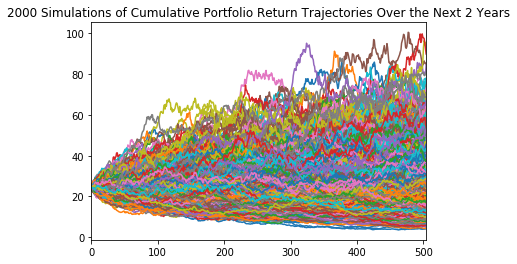

In [25]:
#Simulated stock price trajectory for MJ
plot_title_mj = f"{n+1} Simulations of MJ Cumulative Portfolio Return Trajectories Over the Next 2 Years"
mj_sim_df.plot(legend=None, title=plot_title)


In [26]:
# Select the end of year for MJ simulation
simulated_end_yr1 = mj_sim_df.iloc[252, :]
simulated_end_yr1.head()

Simulation 1    27.311004
Simulation 2    13.076273
Simulation 3    44.926152
Simulation 4    24.786416
Simulation 5    21.832342
Name: 252, dtype: float64

In [27]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval_yr1 = simulated_end_yr1.quantile(q=[0.025, 0.975])
confidence_interval_yr1

0.025    11.757213
0.975    46.471550
Name: 252, dtype: float64

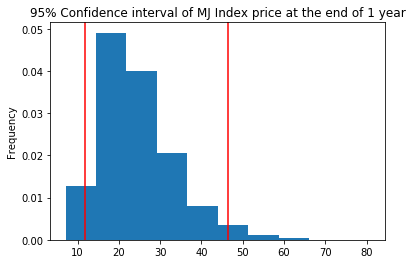

In [28]:
#Simulated returns at 1 year with 95% confidence interval
simulated_end_yr1.plot(kind='hist', title= "95% Confidence interval of MJ Index price at the end of 1 year", density=True, bins=10)
plt.axvline(confidence_interval_yr1.iloc[0], color='r')
plt.axvline(confidence_interval_yr1.iloc[1], color='r')

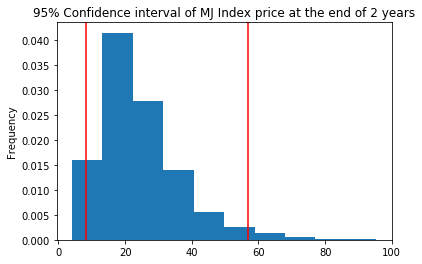

In [29]:
# Select the end of year 2 for MJ simulation and confidence interval
simulated_end_yr2 = mj_sim_df.iloc[-1, :]
confidence_interval_yr2 = simulated_end_yr2.quantile(q=[0.025, 0.975])
simulated_end_yr2.plot(kind='hist', title= "95% Confidence interval of MJ Index price at the end of 2 years", density=True, bins=10)
plt.axvline(confidence_interval_yr2.iloc[0], color='r')
plt.axvline(confidence_interval_yr2.iloc[1], color='r')
#simulated_end_yr2.head()


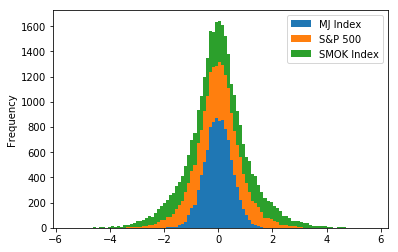

In [30]:
std_dev_daily_return_mj = np.random.normal(scale=0.5, size=10000)
std_dev_daily_return_spy = np.random.normal(scale=1.0, size=10000)
std_dev_daily_return_smok = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "MJ Index": std_dev_daily_return_mj,
    "S&P 500": std_dev_daily_return_spy,
    "SMOK Index": std_dev_daily_return_smok
})

portfolio_std.plot.hist(stacked=True, bins=100)

In [31]:
# Start writing functions for panel

def cumulative_returns():
    cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
    cumulative_returns_indexes.plot(figsize=(20,10), title= "Cumulative Index Returns", fontsize=13);
    return

In [45]:
#create a function for monte carlo

def monte_carlo():
    mj_sim_df= pd.DataFrame()

    for n in range(number_simulations):
    
    #initialize simulation
        simulated_mj_prices_index = [mj_last_price]

        for i in range(number_records):
        # Calculate the simulated price using the last price within the list
            mj_sim_price = simulated_mj_prices_index[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        # Append the simulated price to the list
            simulated_mj_prices_index.append(mj_sim_price)
    
    # Create a DataFrame of the simulated prices
    #simulated_price_df = pd.DataFrame({
        #"Simulated MJ Prices": simulated_mj_prices
        #})

    # Print head of DataFrame
        mj_sim_df[f"Simulation {n+1}"]= pd.Series(simulated_mj_prices_index)
    return

In [46]:
monte_carlo()

ValueError: scale < 0

Row
    [0] Str(Empty)

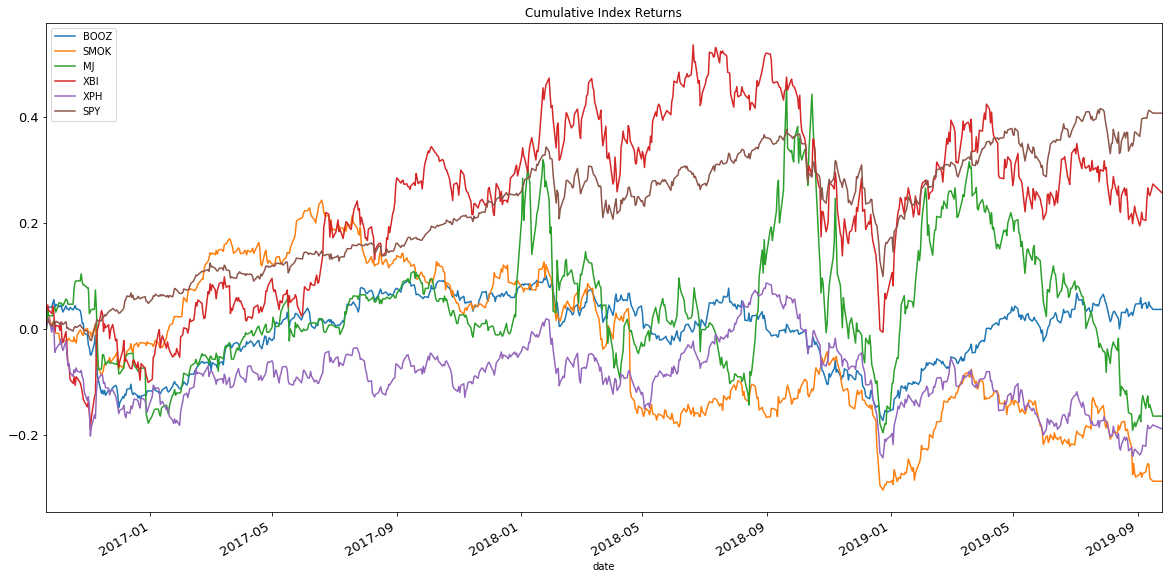

In [43]:
row = pn.Row(cumulative_returns())
row



Tabs
    [0] Str(Empty, name='Sector Comparison')
    [1] Markdown(str, name='Alcohol Portfolio')
    [2] Markdown(str, name='Tobacco Portfolio')

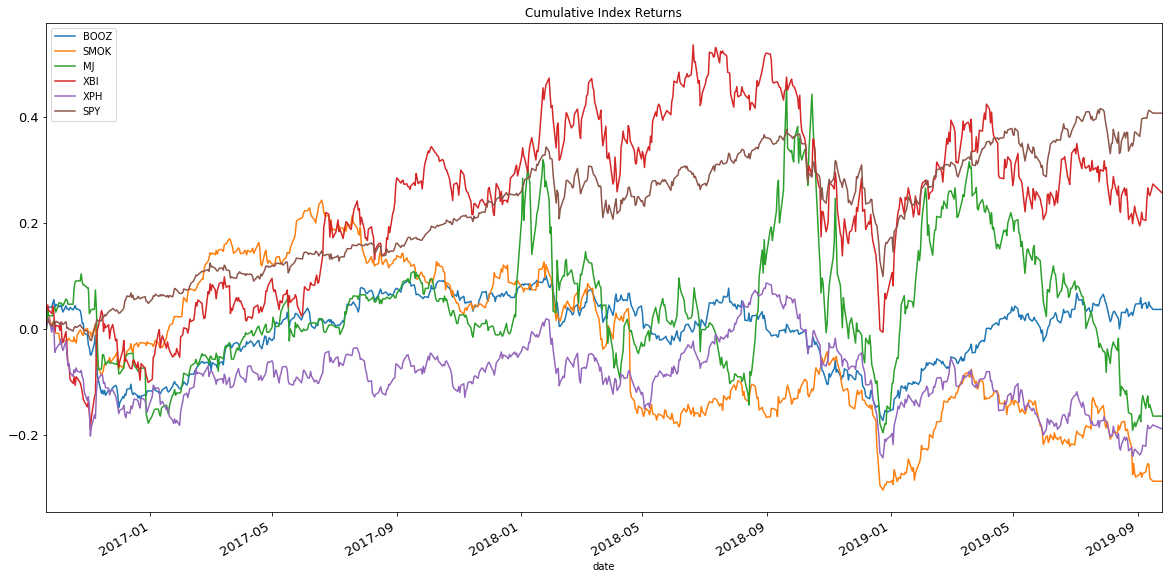

In [38]:
# Create tabs
tabs = pn.Tabs(
    ("Sector Comparison", cumulative_returns()),
    ("Alcohol Portfolio", "test"),
    ("Tobacco Portfolio", "Waiting for plot") )
tabs

